# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers

# Define a Dataset (Fashion MNIST)

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

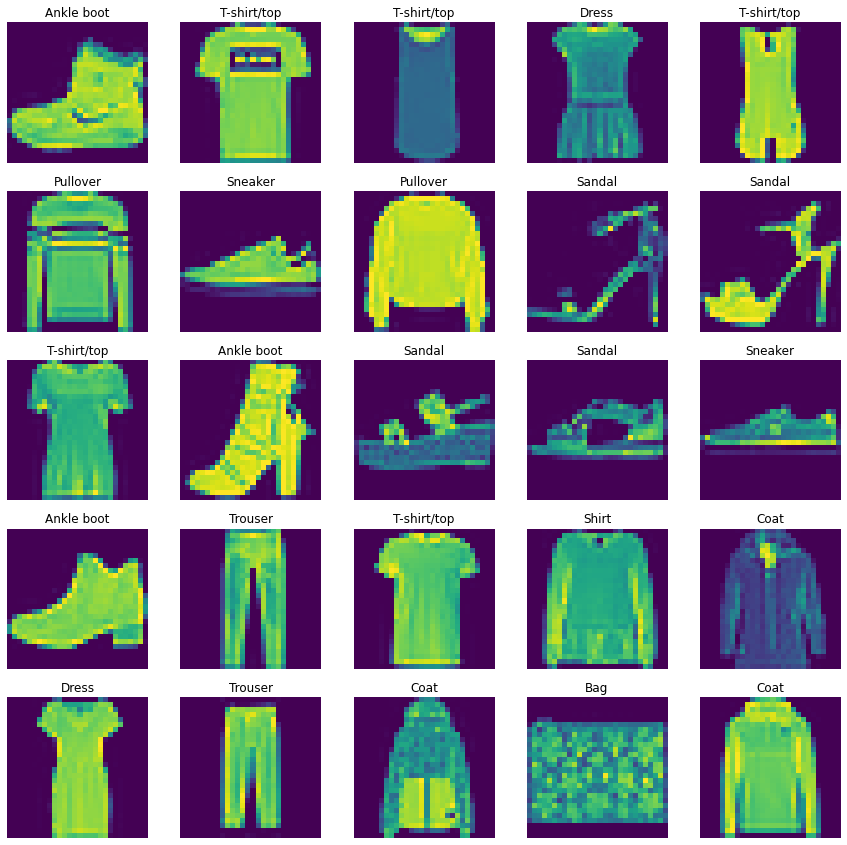

In [ ]:
plt.figure(figsize=(15,15))

for i in range(0,25,1):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[train_labels[i]])
  plt.axis('off')

plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
# Normaise images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Functions

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Neural Network CNN


In [ ]:
model = tf.keras.Sequential([
                             layers.Conv2D(32,(3,3), activation='relu', strides=(1,1), input_shape=(28,28,1)),
                             layers.MaxPool2D((2,2)),

                             layers.Conv2D(64, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),

                             layers.Dropout(0.5),

                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)             

In [ ]:
c = model.fit(train_images, train_labels, epochs=15, batch_size=12, validation_split=0.1)

Epoch 1/15
4500/4500 [==============================] - 12s 3ms/step - loss: 0.6431 - accuracy: 0.7644 - val_loss: 0.3345 - val_accuracy: 0.8773
Epoch 2/15
4500/4500 [==============================] - 12s 3ms/step - loss: 0.3554 - accuracy: 0.8697 - val_loss: 0.2999 - val_accuracy: 0.8860
Epoch 3/15
4500/4500 [==============================] - 12s 3ms/step - loss: 0.3084 - accuracy: 0.8844 - val_loss: 0.2732 - val_accuracy: 0.8993
Epoch 4/15
4500/4500 [==============================] - 12s 3ms/step - loss: 0.2842 - accuracy: 0.8932 - val_loss: 0.2815 - val_accuracy: 0.8953
Epoch 5/15
4500/4500 [==============================] - 12s 3ms/step - loss: 0.2690 - accuracy: 0.8983 - val_loss: 0.2621 - val_accuracy: 0.9022
Epoch 6/15
4500/4500 [==============================] - 12s 3ms/step - loss: 0.2522 - accuracy: 0.9040 - val_loss: 0.2474 - val_accuracy: 0.9065
Epoch 7/15
4500/4500 [==============================] - 12s 3ms/step - loss: 0.2424 - accuracy: 0.9085 - val_loss: 0.2422 - val_ac

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.9099


[0.2606275975704193, 0.9099000096321106]

Confusion matrix, without normalization


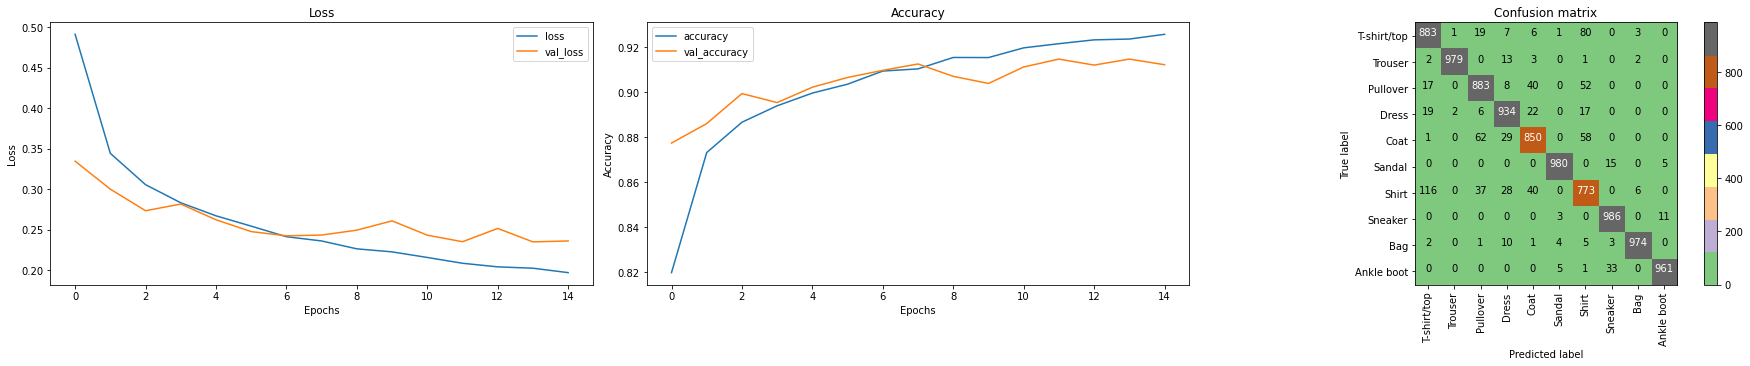

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(132)
plt.plot(c.history['accuracy'], label='accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

predictions = model.predict(test_images)
p = []
for prediction in predictions:
  prediction = np.argmax(prediction)
  p.append(prediction)
p_test = p


plt.subplot(133)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, classes=class_names, cmap='Accent')

plt.show()